In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('glove_with_sentiment.csv')
df2 = pd.read_csv('w2v_with_sentiment.csv')

In [ ]:
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)

Shape of df1: (43921, 101)
Shape of df2: (43921, 101)


In [ ]:
print("Head of df1:\n", df1.head())
print("Head of df2:\n", df2.head())

Head of df1:
           0         1         2         3         4         5         6  \
0  0.012180  0.074902 -0.043630 -0.276964  0.154914 -0.173644  0.147333   
1 -0.106570  0.112714 -0.329417  0.046741  0.099992 -0.266661  0.043918   
2 -0.254155  0.188963  0.107758 -0.177842  0.353487 -0.341862  0.180098   
3  0.029181  0.278086  0.268585 -0.129722  0.089835 -0.165962  0.214465   
4 -0.057234  0.173026  0.038330 -0.099591  0.345777 -0.364918  0.334914   

          7         8         9  ...        91        92        93        94  \
0  0.080279 -0.061463 -0.119787  ...  0.152351 -0.210992 -0.040352 -0.069911   
1  0.077614  0.131717  0.179163  ... -0.018481 -0.028758 -0.069776 -0.042459   
2 -0.309501 -0.434817 -0.139549  ... -0.016284 -0.111855 -0.286337 -0.032213   
3 -0.394100 -0.075207  0.011965  ...  0.032967  0.105251 -0.140879  0.196644   
4 -0.093474 -0.196375 -0.202744  ... -0.053238  0.016135 -0.167982 -0.010753   

         95        96        97        98        99  s

#LOGISTIC REGRESSION

🔁 Running Logistic models:   0%|          | 0/2 [00:00<?, ?it/s]


🧪 Logistic Regression Evaluation for: GloVe
🔍 Grid Search



Grid Search: 100%|██████████| 4/4 [00:16<00:00,  5.12s/it]
                                                          

✅ Best Params: {'C': 10} — Val Accuracy: 0.5759

📊 Test Set Performance:
🧮 Accuracy: 0.5748
🎯 F1 Score: 0.5674
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      2607
           1       0.52      0.39      0.45      2334
           2       0.61      0.71      0.65      3844

    accuracy                           0.57      8785
   macro avg       0.56      0.55      0.55      8785
weighted avg       0.57      0.57      0.57      8785



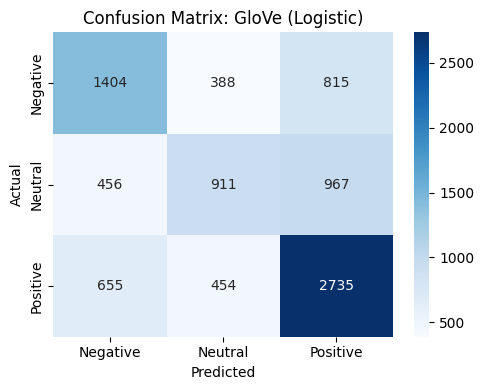

🔁 Running Logistic models:  50%|█████     | 1/2 [00:25<00:25, 25.94s/it]


🧪 Logistic Regression Evaluation for: Word2Vec
🔍 Grid Search



Grid Search: 100%|██████████| 4/4 [00:06<00:00,  2.16s/it]
                                                          

✅ Best Params: {'C': 10} — Val Accuracy: 0.4860

📊 Test Set Performance:
🧮 Accuracy: 0.4707
🎯 F1 Score: 0.4056
              precision    recall  f1-score   support

           0       0.44      0.24      0.31      2607
           1       0.46      0.10      0.17      2334
           2       0.48      0.85      0.61      3844

    accuracy                           0.47      8785
   macro avg       0.46      0.40      0.36      8785
weighted avg       0.46      0.47      0.41      8785



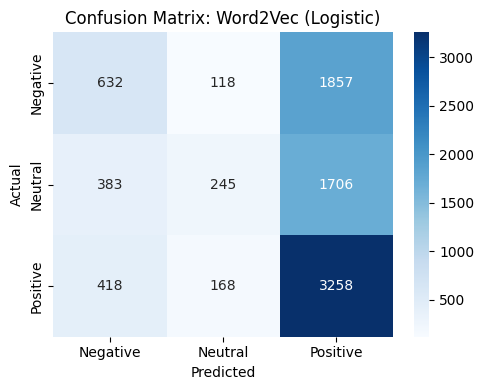

🔁 Running Logistic models: 100%|██████████| 2/2 [00:36<00:00, 18.06s/it]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
from itertools import product
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

df_glove = pd.read_csv("glove_with_sentiment.csv")
df_w2v = pd.read_csv("w2v_with_sentiment.csv")

X_glove = df_glove.drop("sentiment", axis=1).values
y_glove = df_glove["sentiment"].values

X_w2v = df_w2v.drop("sentiment", axis=1).values
y_w2v = df_w2v["sentiment"].values

results = {
    "GloVe": (X_glove, y_glove),
    "Word2Vec": (X_w2v, y_w2v)
}

metric_log = []

# ─── Logistic Regression Eval ───────────────────────────────────
for name, (X, y) in tqdm(results.items(), desc="🔁 Running Logistic models"):
    print(f"\n🧪 Logistic Regression Evaluation for: {name}")
    print("=" * 70)

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42)

    best_score = 0
    best_params = {}
    param_grid = {'C': [0.01, 0.1, 1, 10]}
    grid = list(product(param_grid["C"],))

    print("🔍 Grid Search")
    for (C,) in tqdm(grid, desc="Grid Search", leave=False):
        model = LogisticRegression(C=C, max_iter=1000)
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_val_pred)

        if acc > best_score:
            best_score = acc
            best_params = {"C": C}

    print(f"✅ Best Params: {best_params} — Val Accuracy: {best_score:.4f}")

    # Final training
    final_model = LogisticRegression(**best_params, max_iter=1000)
    final_model.fit(X_trainval, y_trainval)

    # Evaluate
    y_pred = final_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print("\n📊 Test Set Performance:")
    print(f"🧮 Accuracy: {acc:.4f}")
    print(f"🎯 F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))

    # Log
    metric_log.append({
        "Embedding": name,
        "Model": "Logistic",
        "Accuracy": acc,
        "F1 Score": f1
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Negative", "Neutral", "Positive"],
                yticklabels=["Negative", "Neutral", "Positive"])
    plt.title(f"Confusion Matrix: {name} (Logistic)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


# LSTM ON W2V

PREPARING INPUT SEQUENCES

In [ ]:
import json
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split
from tqdm import tqdm


with open("vocab.json", "r") as f:
    word2idx = json.load(f)["word2idx"]

vocab_size = max(map(int, word2idx.values())) + 1

# ─── Load and pad embedding matrix ──────────────────────────────
original_embeddings = np.load("embeddings.npy")

if original_embeddings.shape[0] < vocab_size:
    pad_rows = vocab_size - original_embeddings.shape[0]
    embedding_matrix = np.vstack([original_embeddings, np.zeros((pad_rows, original_embeddings.shape[1]))])
else:
    embedding_matrix = original_embeddings

embedding_tensor = torch.tensor(embedding_matrix, dtype=torch.float)


In [ ]:
# ─── Load labeled preprocessed dataset ──────────────────────────
with open("combined_dataset.json", "r") as f:
    data = json.load(f)

max_len = 50
inputs, labels = [], []

for item in data:
    idx_seq = [word2idx[t] for t in item["tokens"] if t in word2idx]
    if idx_seq:
        inputs.append(torch.tensor(idx_seq[:max_len]))
        labels.append(item["sentiment_num"])

# ─── Pad input sequences ────────────────────────────────────────
padded_inputs = pad_sequence(inputs, batch_first=True, padding_value=0)
labels = torch.tensor(labels)

# ─── Split ──────────────────────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(padded_inputs, labels, test_size=0.2, stratify=labels)

class SentimentDataset(Dataset):
    def __init__(self, X, y): self.X, self.y = X, y
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_dl = DataLoader(SentimentDataset(X_train, y_train), batch_size=64, shuffle=True)
test_dl = DataLoader(SentimentDataset(X_test, y_test), batch_size=64)


LSTM CLASSIFIER

In [ ]:
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, num_classes):
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(embedding_tensor, freeze=True)
        self.lstm = nn.LSTM(emb_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        _, (hn, _) = self.lstm(x)
        return self.fc(hn[-1])


Epoch 1/10 - Loss: 1.0768
Epoch 2/10 - Loss: 1.0763
Epoch 3/10 - Loss: 1.0762
Epoch 4/10 - Loss: 1.0759
Epoch 5/10 - Loss: 1.0760
Epoch 6/10 - Loss: 1.0760
Epoch 7/10 - Loss: 1.0741
Epoch 8/10 - Loss: 1.0716
Epoch 9/10 - Loss: 1.0707
Epoch 10/10 - Loss: 1.0698


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


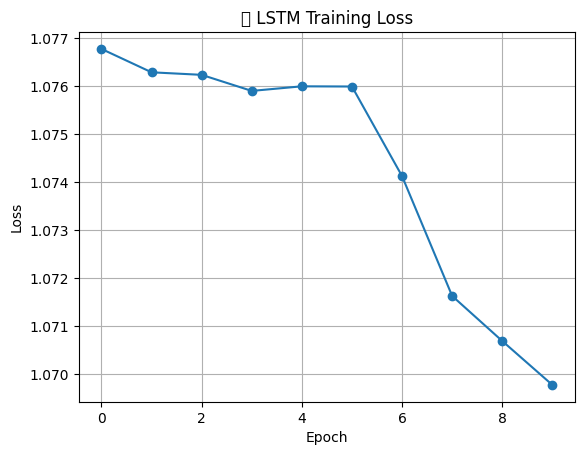

In [ ]:
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
model = LSTMClassifier(vocab_size, embedding_tensor.shape[1], hidden_dim=128, num_classes=3).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

losses = []
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = loss_fn(out, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_dl)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

# Plot training loss
plt.plot(losses, marker="o")
plt.title("📉 LSTM Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      2596
     Neutral       0.00      0.00      0.00      2332
    Positive       0.43      1.00      0.61      3794

    accuracy                           0.43      8722
   macro avg       0.14      0.33      0.20      8722
weighted avg       0.19      0.43      0.26      8722



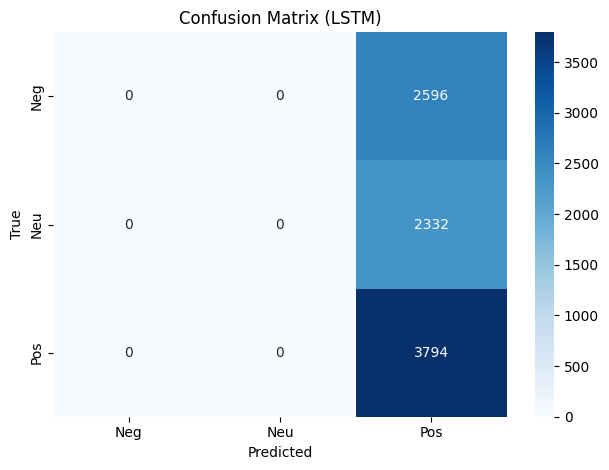

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model.eval()
all_preds, all_true = [], []

with torch.no_grad():
    for xb, yb in test_dl:
        preds = model(xb.to(device)).argmax(dim=1).cpu()
        all_preds.extend(preds.tolist())
        all_true.extend(yb.tolist())

print(classification_report(all_true, all_preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion matrix
cm = confusion_matrix(all_true, all_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Neg", "Neu", "Pos"],
            yticklabels=["Neg", "Neu", "Pos"])
plt.title("Confusion Matrix (LSTM)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


LSTM ON GLOVE EMBEDDINGS

In [ ]:
# ─── Load vocab ─────────────────────────────────────────────────
with open("vocab.json", "r") as f:
    word2idx = json.load(f)["word2idx"]

vocab_size = max(map(int, word2idx.values())) + 1

# ─── Load and pad embedding matrix ──────────────────────────────
original_embeddings = np.load("glove_embeddings.npy")

if original_embeddings.shape[0] < vocab_size:
    pad_rows = vocab_size - original_embeddings.shape[0]
    embedding_matrix = np.vstack([original_embeddings, np.zeros((pad_rows, original_embeddings.shape[1]))])
else:
    embedding_matrix = original_embeddings

embedding_tensor = torch.tensor(embedding_matrix, dtype=torch.float)

In [ ]:
# ─── Load labeled preprocessed dataset ──────────────────────────
with open("combined_dataset.json", "r") as f:
    data = json.load(f)

max_len = 50
inputs, labels = [], []

for item in data:
    idx_seq = [word2idx[t] for t in item["tokens"] if t in word2idx]
    if idx_seq:
        inputs.append(torch.tensor(idx_seq[:max_len]))
        labels.append(item["sentiment_num"])

# ─── Pad input sequences ────────────────────────────────────────
padded_inputs = pad_sequence(inputs, batch_first=True, padding_value=0)
labels = torch.tensor(labels)

# ─── Split ──────────────────────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(padded_inputs, labels, test_size=0.2, stratify=labels)

class SentimentDataset(Dataset):
    def __init__(self, X, y): self.X, self.y = X, y
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_dl = DataLoader(SentimentDataset(X_train, y_train), batch_size=64, shuffle=True)
test_dl = DataLoader(SentimentDataset(X_test, y_test), batch_size=64)


Epoch 1/10 - Loss: 1.0773
Epoch 2/10 - Loss: 1.0760
Epoch 3/10 - Loss: 1.0758
Epoch 4/10 - Loss: 1.0761
Epoch 5/10 - Loss: 1.0719
Epoch 6/10 - Loss: 0.9907
Epoch 7/10 - Loss: 0.9304
Epoch 8/10 - Loss: 0.8665
Epoch 9/10 - Loss: 0.8104
Epoch 10/10 - Loss: 0.7674


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


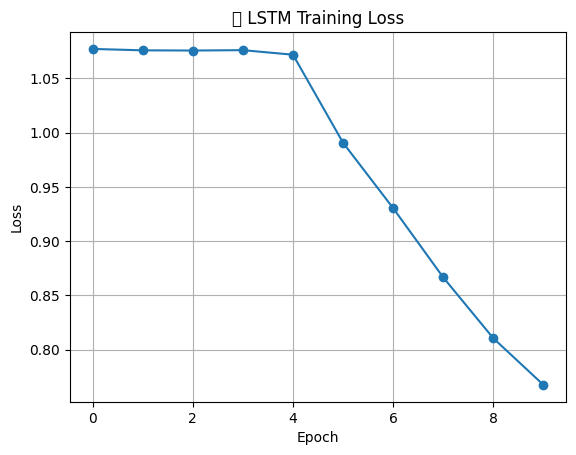

In [ ]:
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
model = LSTMClassifier(vocab_size, embedding_tensor.shape[1], hidden_dim=128, num_classes=3).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

losses = []
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = loss_fn(out, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_dl)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

# Plot training loss
plt.plot(losses, marker="o")
plt.title("📉 LSTM Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

    Negative       0.61      0.69      0.65      2596
     Neutral       0.58      0.53      0.56      2332
    Positive       0.73      0.70      0.71      3794

    accuracy                           0.65      8722
   macro avg       0.64      0.64      0.64      8722
weighted avg       0.65      0.65      0.65      8722



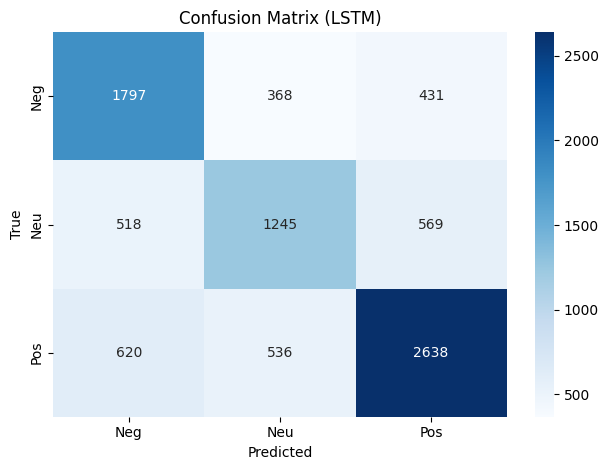

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model.eval()
all_preds, all_true = [], []

with torch.no_grad():
    for xb, yb in test_dl:
        preds = model(xb.to(device)).argmax(dim=1).cpu()
        all_preds.extend(preds.tolist())
        all_true.extend(yb.tolist())

print(classification_report(all_true, all_preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion matrix
cm = confusion_matrix(all_true, all_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Neg", "Neu", "Pos"],
            yticklabels=["Neg", "Neu", "Pos"])
plt.title("Confusion Matrix (LSTM)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


#GRU

1)W2V

In [ ]:
import json
import numpy as np
import torch

with open("vocab.json", "r") as f:
    word2idx = json.load(f)["word2idx"]

vocab_size = max(map(int, word2idx.values())) + 1
original_embeddings = np.load("embeddings.npy")           # Word2Vec

if original_embeddings.shape[0] < vocab_size:
    pad_rows = vocab_size - original_embeddings.shape[0]
    embedding_matrix = np.vstack([original_embeddings, np.zeros((pad_rows, original_embeddings.shape[1]))])
else:
    embedding_matrix = original_embeddings

embedding_tensor = torch.tensor(embedding_matrix, dtype=torch.float)


In [ ]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split

with open("combined_dataset.json", "r") as f:
    data = json.load(f)

max_len = 50
inputs, labels = [], []

for item in data:
    idx_seq = [word2idx[t] for t in item["tokens"] if t in word2idx]
    if idx_seq:
        inputs.append(torch.tensor(idx_seq[:max_len]))
        labels.append(item["sentiment_num"])

padded_inputs = pad_sequence(inputs, batch_first=True, padding_value=0)
labels = torch.tensor(labels)

X_train, X_test, y_train, y_test = train_test_split(padded_inputs, labels, test_size=0.2, stratify=labels)

class SentimentDataset(Dataset):
    def __init__(self, X, y): self.X, self.y = X, y
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_dl = DataLoader(SentimentDataset(X_train, y_train), batch_size=64, shuffle=True)
test_dl = DataLoader(SentimentDataset(X_test, y_test), batch_size=64)


In [ ]:
import torch.nn as nn

class GRUClassifier(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, num_classes):
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(embedding_tensor, freeze=True)
        self.gru = nn.GRU(emb_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        _, hn = self.gru(x)
        return self.fc(hn[-1])


Epoch 1/10 - Loss: 1.0772
Epoch 2/10 - Loss: 1.0764
Epoch 3/10 - Loss: 1.0761
Epoch 4/10 - Loss: 1.0760
Epoch 5/10 - Loss: 1.0728
Epoch 6/10 - Loss: 1.0685
Epoch 7/10 - Loss: 1.0617
Epoch 8/10 - Loss: 1.0569
Epoch 9/10 - Loss: 1.0458
Epoch 10/10 - Loss: 1.0241


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


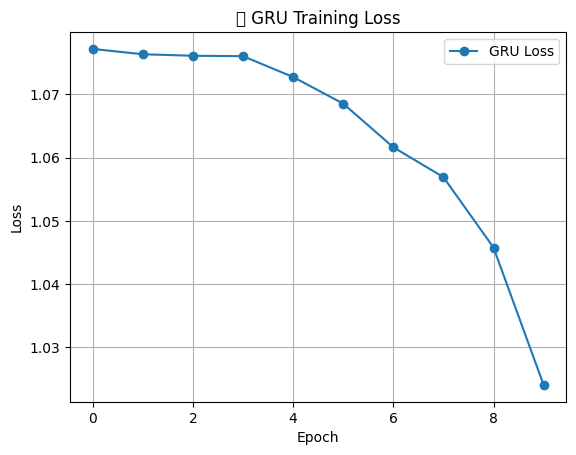

In [ ]:
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
model = GRUClassifier(vocab_size, embedding_tensor.shape[1], hidden_dim=128, num_classes=3).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

losses = []
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = loss_fn(out, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_dl)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

# Plot training loss
plt.plot(losses, marker="o", label="GRU Loss")
plt.title("📉 GRU Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


              precision    recall  f1-score   support

    Negative       0.39      0.62      0.48      2596
     Neutral       0.41      0.10      0.16      2332
    Positive       0.55      0.59      0.57      3794

    accuracy                           0.47      8722
   macro avg       0.45      0.44      0.40      8722
weighted avg       0.47      0.47      0.43      8722



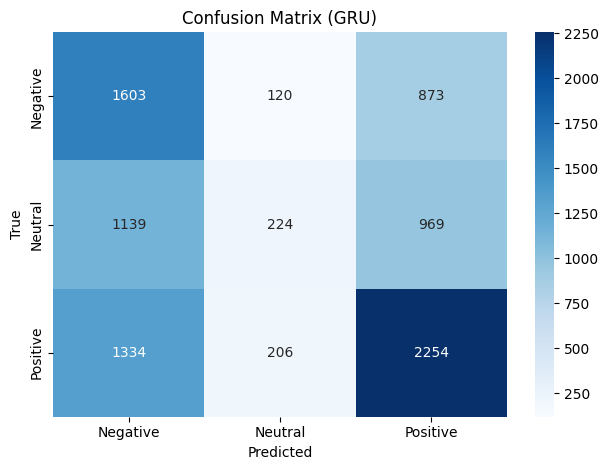

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model.eval()
all_preds, all_true = [], []

with torch.no_grad():
    for xb, yb in test_dl:
        preds = model(xb.to(device)).argmax(dim=1).cpu()
        all_preds.extend(preds.tolist())
        all_true.extend(yb.tolist())

print(classification_report(all_true, all_preds, target_names=["Negative", "Neutral", "Positive"]))

cm = confusion_matrix(all_true, all_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix (GRU)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


2)ON GLOVE

In [ ]:
import json
import numpy as np
import torch

with open("vocab.json", "r") as f:
    word2idx = json.load(f)["word2idx"]

vocab_size = max(map(int, word2idx.values())) + 1

original_embeddings = np.load("glove_embeddings.npy")

if original_embeddings.shape[0] < vocab_size:
    pad_rows = vocab_size - original_embeddings.shape[0]
    embedding_matrix = np.vstack([original_embeddings, np.zeros((pad_rows, original_embeddings.shape[1]))])
else:
    embedding_matrix = original_embeddings

embedding_tensor = torch.tensor(embedding_matrix, dtype=torch.float)

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split

with open("combined_dataset.json", "r") as f:
    data = json.load(f)

max_len = 50
inputs, labels = [], []

for item in data:
    idx_seq = [word2idx[t] for t in item["tokens"] if t in word2idx]
    if idx_seq:
        inputs.append(torch.tensor(idx_seq[:max_len]))
        labels.append(item["sentiment_num"])

padded_inputs = pad_sequence(inputs, batch_first=True, padding_value=0)
labels = torch.tensor(labels)

X_train, X_test, y_train, y_test = train_test_split(padded_inputs, labels, test_size=0.2, stratify=labels)

class SentimentDataset(Dataset):
    def __init__(self, X, y): self.X, self.y = X, y
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_dl = DataLoader(SentimentDataset(X_train, y_train), batch_size=64, shuffle=True)
test_dl = DataLoader(SentimentDataset(X_test, y_test), batch_size=64)


Epoch 1/10 - Loss: 1.0768
Epoch 2/10 - Loss: 1.0764
Epoch 3/10 - Loss: 1.0761
Epoch 4/10 - Loss: 1.0756
Epoch 5/10 - Loss: 1.0755
Epoch 6/10 - Loss: 1.0755
Epoch 7/10 - Loss: 1.0754
Epoch 8/10 - Loss: 1.0389
Epoch 9/10 - Loss: 0.8971
Epoch 10/10 - Loss: 0.8177


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


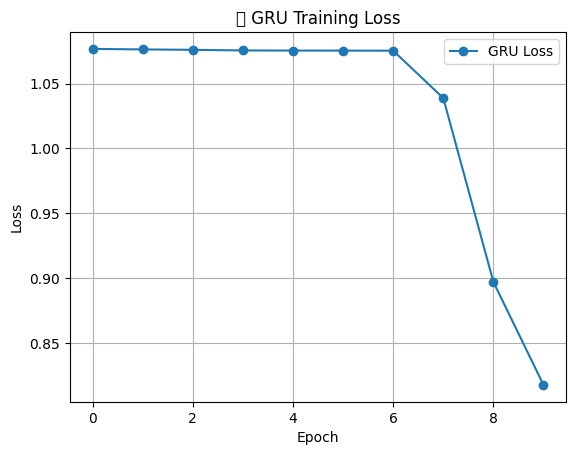

In [ ]:
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
model = GRUClassifier(vocab_size, embedding_tensor.shape[1], hidden_dim=128, num_classes=3).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

losses = []
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = loss_fn(out, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_dl)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

# Plot training loss
plt.plot(losses, marker="o", label="GRU Loss")
plt.title("📉 GRU Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


              precision    recall  f1-score   support

    Negative       0.59      0.67      0.62      2596
     Neutral       0.58      0.46      0.52      2332
    Positive       0.68      0.70      0.69      3794

    accuracy                           0.63      8722
   macro avg       0.62      0.61      0.61      8722
weighted avg       0.63      0.63      0.62      8722



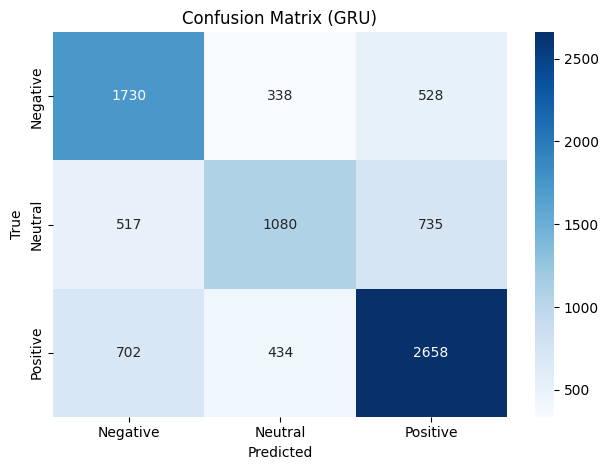

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model.eval()
all_preds, all_true = [], []

with torch.no_grad():
    for xb, yb in test_dl:
        preds = model(xb.to(device)).argmax(dim=1).cpu()
        all_preds.extend(preds.tolist())
        all_true.extend(yb.tolist())

print(classification_report(all_true, all_preds, target_names=["Negative", "Neutral", "Positive"]))

cm = confusion_matrix(all_true, all_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix (GRU)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
